In [4]:
# Modelo de Regresion Lineal multiple para prediccion de ventas 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn.model_selection as model_selection
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler


# 1 Cargar datos y explorar datos

url = "https://raw.githubusercontent.com/selva86/datasets/master/Advertising.csv"
df = pd.read_csv(url)

print("Impresion de las primeras 5 columnas")
print(df.head())

print("Informacion general del dataset")
print(df.info())

# 2 Verificacion de valores nulos 
print("Valores nulos x columna")
print(df.isnull().sum())


Impresion de las primeras 5 columnas
   Unnamed: 0     TV  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9
Informacion general del dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None
Valores nulos x columna
Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64


In [5]:
# 3 Division del conjunto de datos 

# Analizando los datos se ha definido las siguientes variables 
# X: Variables predictoras (TV, Radio, Newspaper)
# Y: Variable dependiente (Sales)

x = df[['TV', 'radio', 'newspaper']]
y = df['sales']

# Dividir los datos en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2, random_state=42)

# 4 Definicion del modelo 
model = LinearRegression()

# 5 Entrenamiento del modelo 
model.fit(x_train, y_train)

# 6 Predicciones 
y_pred = model.predict(x_test)

Metricas de evaluacion del modelo
MSE (Entrenamiento (Error cuadratico medio)): 2.705129423081414
MSE (Prueba (Error cuadratico medio)): 3.1740973539761033
R^2 (Entrenamiento (Coeficiente de determinacion)): 0.8957008271017818
R^2 (Prueba (Coeficiente de determinacion)): 0.899438024100912
MAE (Entrenamiento (Error absoluto promedio)): 1.1984678961500137
MAE (Prueba (Error absoluto promedio)): 1.4607567168117603


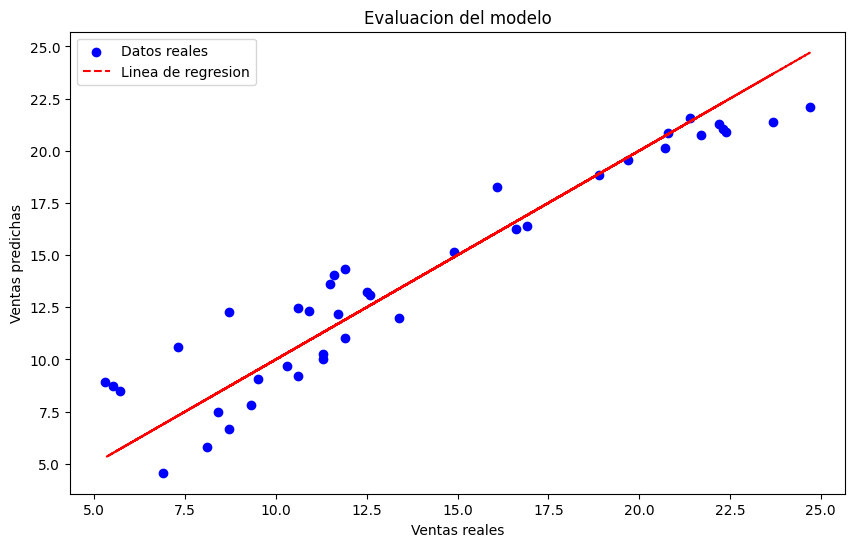

In [6]:
# 7 Evaluacion del modelo 

# Preddicion para el conjunto de entrenamiento y prueba
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

# Calcular el error cuadrático medio (MSE)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Calulcar el coeficiente de determinacion 
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculo del error absoluto promedio
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Visualizacion de resultados
print("Metricas de evaluacion del modelo")
print(f"MSE (Entrenamiento (Error cuadratico medio)): {mse_train}")
print(f"MSE (Prueba (Error cuadratico medio)): {mse_test}")
print(f"R^2 (Entrenamiento (Coeficiente de determinacion)): {r2_train}")
print(f"R^2 (Prueba (Coeficiente de determinacion)): {r2_test}")
print(f"MAE (Entrenamiento (Error absoluto promedio)): {mae_train}")
print(f"MAE (Prueba (Error absoluto promedio)): {mae_test}")

# Creacion de graficos para evaluar el modelo  
plt.style.use('default')
sns.set_palette("bright")

# Grafico
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Datos reales')
plt.plot(y_test, y_test, color='red', linestyle='--', label='Linea de regresion')
plt.xlabel('Ventas reales')
plt.ylabel('Ventas predichas')
plt.title('Evaluacion del modelo')
plt.legend()
plt.show()